In [61]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error import HTTPError

In [62]:
def getTitle(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
         return None
    try:
        bsObj = BeautifulSoup(html.read())
        title = bsObj.body.h1
    except AttributeError as e:
         return None
    return title

In [63]:
title = getTitle("http://www.pythonscraping.com/pages/page1.html")
if title == None:
    print("Title could not be found")
else:
    print(title)

<h1>An Interesting Title</h1>


C:\Users\kd\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\kd\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [64]:
html = urlopen("http://www.pythonscraping.com/pages/warandpeace.html")
bsObj = BeautifulSoup(html.read())
print(bsObj.h1)

<h1>War and Peace</h1>


C:\Users\kd\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\kd\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [65]:
allText = bsObj.findAll(id="text")
print(allText[0].get_text())


"Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news."

It was in July, 1805, and the speaker was the well-known Anna
Pavlovna Scherer, maid of honor and favorite of the Empress Marya
Fedorovna. With these words she greeted Prince Vasili Kuragin, a man
of high rank and importance, who was the first to arrive at her
reception. Anna Pavlovna had had a cough for some days. She was, as
she said, suffering from la grippe; grippe being then a new word in
St. Petersburg, used only by the elite.

All her invitations without exception, written in French, and
delivered by a scarlet-liveri

## Cleaning Text

In [66]:
soup = bsObj.get_text(strip=True)
print(soup)

.green{
	color:#55ff55;
}
.red{
	color:#ff5555;
}
#text{
	width:50%;
}War and PeaceChapter 1"Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news."It was in July, 1805, and the speaker was the well-knownAnna
Pavlovna Scherer, maid of honor and favorite of theEmpress Marya
Fedorovna. With these words she greetedPrince Vasili Kuragin, a man
of high rank and importance, who was the first to arrive at her
reception.Anna Pavlovnahad had a cough for some days. She was, as
she said, suffering from la grippe; grippe being then a new word inSt. Petersburg, used only by the elite.All her in

## Spliting the text into token 

In [67]:
tokens = [t for t in soup.split()]
print(tokens)

['.green{', 'color:#55ff55;', '}', '.red{', 'color:#ff5555;', '}', '#text{', 'width:50%;', '}War', 'and', 'PeaceChapter', '1"Well,', 'Prince,', 'so', 'Genoa', 'and', 'Lucca', 'are', 'now', 'just', 'family', 'estates', 'of', 'the', 'Buonapartes.', 'But', 'I', 'warn', 'you,', 'if', 'you', "don't", 'tell', 'me', 'that', 'this', 'means', 'war,', 'if', 'you', 'still', 'try', 'to', 'defend', 'the', 'infamies', 'and', 'horrors', 'perpetrated', 'by', 'that', 'Antichrist-', 'I', 'really', 'believe', 'he', 'is', 'Antichrist-', 'I', 'will', 'have', 'nothing', 'more', 'to', 'do', 'with', 'you', 'and', 'you', 'are', 'no', 'longer', 'my', 'friend,', 'no', 'longer', 'my', "'faithful", "slave,'", 'as', 'you', 'call', 'yourself!', 'But', 'how', 'do', 'you', 'do?', 'I', 'see', 'I', 'have', 'frightened', 'you-', 'sit', 'down', 'and', 'tell', 'me', 'all', 'the', 'news."It', 'was', 'in', 'July,', '1805,', 'and', 'the', 'speaker', 'was', 'the', 'well-knownAnna', 'Pavlovna', 'Scherer,', 'maid', 'of', 'honor'

## Count Word Frequency

In [68]:
import nltk
freq = nltk.FreqDist(tokens)
for key, val in freq.items():
    print(str(key) + ':' + str(val))

.green{:1
color:#55ff55;:1
}:2
.red{:1
color:#ff5555;:1
#text{:1
width:50%;:1
}War:1
and:56
PeaceChapter:1
1"Well,:1
Prince,:1
so:6
Genoa:1
Lucca:1
are:9
now:1
just:5
family:1
estates:1
of:32
the:46
Buonapartes.:1
But:2
I:25
warn:1
you,:2
if:7
you:24
don't:7
tell:4
me:8
that:18
this:6
means:1
war,:1
still:2
try:1
to:40
defend:1
infamies:1
horrors:1
perpetrated:1
by:10
Antichrist-:2
really:2
believe:3
he:8
is:19
will:7
have:17
nothing:4
more:3
do:2
with:12
no:4
longer:2
my:4
friend,:2
'faithful:1
slave,':1
as:7
call:1
yourself!:1
how:4
do?:1
see:2
frightened:1
you-:1
sit:1
down:1
all:6
news."It:1
was:8
in:16
July,:1
1805,:1
speaker:1
well-knownAnna:1
Pavlovna:1
Scherer,:1
maid:1
honor:1
favorite:1
theEmpress:1
Marya:2
Fedorovna.:1
With:1
these:3
words:1
she:16
greetedPrince:1
Vasili:1
Kuragin,:1
a:32
man:3
high:2
rank:1
importance,:1
who:5
first:2
arrive:1
at:12
her:18
reception.Anna:1
Pavlovnahad:1
had:12
cough:1
for:7
some:2
days.:1
She:5
was,:1
said,:2
suffering:2
from:1
la:1
grippe;

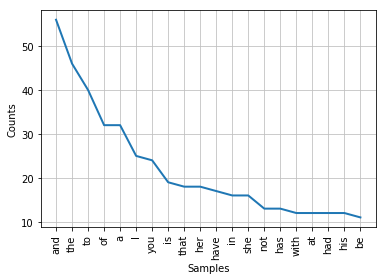

In [69]:
freq.plot(20, cumulative=False)

## Remove Stop Words using NLTK

In [70]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [71]:
clean_tokens = tokens[:]
sr = stopwords.words('english')
for token in tokens:
    if token in sr:
        clean_tokens.remove(token)

In [75]:
freq1 = nltk.FreqDist(clean_tokens)
for keys, val in freq.items():
    print(str(keys) + ':' + str(val))

.green{:1
color:#55ff55;:1
}:2
.red{:1
color:#ff5555;:1
#text{:1
width:50%;:1
}War:1
and:56
PeaceChapter:1
1"Well,:1
Prince,:1
so:6
Genoa:1
Lucca:1
are:9
now:1
just:5
family:1
estates:1
of:32
the:46
Buonapartes.:1
But:2
I:25
warn:1
you,:2
if:7
you:24
don't:7
tell:4
me:8
that:18
this:6
means:1
war,:1
still:2
try:1
to:40
defend:1
infamies:1
horrors:1
perpetrated:1
by:10
Antichrist-:2
really:2
believe:3
he:8
is:19
will:7
have:17
nothing:4
more:3
do:2
with:12
no:4
longer:2
my:4
friend,:2
'faithful:1
slave,':1
as:7
call:1
yourself!:1
how:4
do?:1
see:2
frightened:1
you-:1
sit:1
down:1
all:6
news."It:1
was:8
in:16
July,:1
1805,:1
speaker:1
well-knownAnna:1
Pavlovna:1
Scherer,:1
maid:1
honor:1
favorite:1
theEmpress:1
Marya:2
Fedorovna.:1
With:1
these:3
words:1
she:16
greetedPrince:1
Vasili:1
Kuragin,:1
a:32
man:3
high:2
rank:1
importance,:1
who:5
first:2
arrive:1
at:12
her:18
reception.Anna:1
Pavlovnahad:1
had:12
cough:1
for:7
some:2
days.:1
She:5
was,:1
said,:2
suffering:2
from:1
la:1
grippe;

In [76]:
freq1.most_common()

[('I', 25),
 ('He', 9),
 ('one', 7),
 ('said', 6),
 ('She', 5),
 ('like', 5),
 ('saidthe', 5),
 ('would', 5),
 ('know', 5),
 ('And', 5),
 ('tell', 4),
 ('nothing', 4),
 ('believe', 3),
 ('man', 3),
 ('spoke', 3),
 ('even', 3),
 ('could', 3),
 ('must', 3),
 ('prince.', 3),
 ('vocation', 3),
 ('The', 3),
 ('speak', 3),
 ('understand', 3),
 ('alone', 3),
 ('That', 3),
 ('good', 3),
 ('smiling', 3),
 ('Do', 3),
 ('added', 3),
 ('Empress', 3),
 ('time', 3),
 ('}', 2),
 ('But', 2),
 ('you,', 2),
 ('still', 2),
 ('Antichrist-', 2),
 ('really', 2),
 ('longer', 2),
 ('friend,', 2),
 ('see', 2),
 ('Marya', 2),
 ('high', 2),
 ('first', 2),
 ('said,', 2),
 ('suffering', 2),
 ('word', 2),
 ('without', 2),
 ('poor', 2),
 ('shall', 2),
 ('repliedthe', 2),
 ('prince,', 2),
 ('least', 2),
 ('expression', 2),
 ('French', 2),
 ('natural', 2),
 ('Pavlovna,', 2),
 ('calm', 2),
 ('saidAnna', 2),
 ('"You', 2),
 ('fete', 2),
 ('English', 2),
 ('put', 2),
 ('daughter', 2),
 ('confess', 2),
 ('becoming', 2),
 (

## After Removing the stopwords.

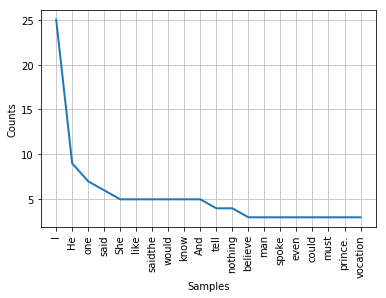

In [78]:
freq1.plot(20,cumulative=False)